In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from EulerFuncional import *

In [2]:
def f(t,y):
    return (2*t)/(1+(t**2))

def yReal(t):
    return np.log(1+(t**2))

In [3]:
y0 = 0.0
h = 0.25
I = [0,1]    
#Euler(f,yReal,h,I,0)

In [4]:
def AdamBashford2(faprox,freal,h,I,y0,grafico):
    '''
    Método Adam - Bashford 2 para Problemas de Valor Inicial
    El método utiliza dos puntos anteriores para calcular el siguiente
    Utilizo el método de Euler Explícito para calcular el primer punto
    Luego aplico Adam-Bashford
    '''
    
    # Creo un DataFrame para hacer la tabla y poder graficar luego
    # Nombro las columnas y creo la primera fila que es el valor inicial
    columnas=["t","yAprox","yReal","eLocal","eGlobal"]
    df = pd.DataFrame(np.array([[I[0],y0,y0,0.0,0.0]]),columns=columnas)    
    
    # Calculo el punto anterior    
    df = df.append(Euler(faprox,freal,h,[I[0],I[0]+h],y0,False).loc[1])
    
    # Determino los pasos a utilizar en funcion del intervalo I y el tamaño de paso h
    # pasos = [I[0]+(i*h) for i in range(1,int((I[1]-I[0])//h)+1)]
    pasos = [i for i in np.arange(I[0]+h,I[1]+h,h)] 
    
    # Usando la fila anterior (resultados del paso anterior) calculo el siguiente
    for i in range(1,len(pasos)):        
        t = pasos[i-1]
        t0 = t-h        
        y = float(df["yAprox"].loc[i])
        y0 = float(df["yAprox"].loc[i-1])
        yaprox = y + ((h/2) * ((3*faprox(t,y))-faprox(t0,y0)))
        yreal = freal(t)
        df = df.append(pd.DataFrame(np.array([[t,yaprox,yreal,abs(yaprox-y),abs(yaprox-yreal)]]),columns=columnas),ignore_index=True)
    
    # Hago un print de la tabla
    if grafico:
        print(df)
    
    # Grafico las funciones y los errores
    if grafico:
        graficar(df)   

        t    yAprox     yReal    eLocal   eGlobal
0    0.00  0.000000  0.000000  0.000000  0.000000
1    0.01  0.000000  0.000100  0.000000  0.000100
2    0.01  0.000300  0.000100  0.000300  0.000200
3    0.02  0.000800  0.000400  0.000500  0.000400
4    0.03  0.001499  0.000900  0.000699  0.000599
..    ...       ...       ...       ...       ...
96   0.95  0.653139  0.643169  0.009990  0.009971
97   0.96  0.663134  0.653158  0.009994  0.009975
98   0.97  0.673131  0.663152  0.009997  0.009979
99   0.98  0.683130  0.673149  0.009999  0.009981
100  0.99  0.693130  0.683147  0.010000  0.009983

[101 rows x 5 columns]


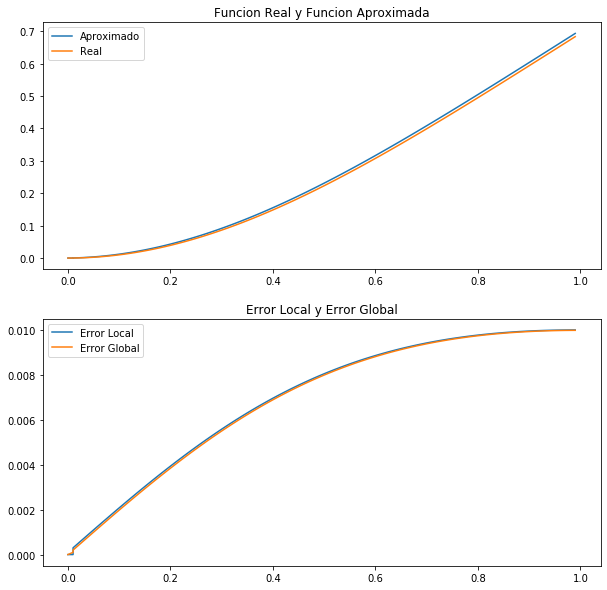

In [5]:
I = [0,1]
y0 = 0
h = 0.010

AdamBashford2(f,yReal,h,I,y0,True)